# Predicting Housing Prices

In [1]:
# imports
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing

c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\danie\pycharmprojects\tensorflowtest\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Loading & Processing Data

In [9]:
# Load in data
(train_data, train_label), (test_data, test_label) = (boston_housing.load_data())

# means calculatd along first axis (for any column, get mean of rows in that column)
# note that rows are first axis
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

### Building and Training Model

In [70]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [74]:
# train with k-fold validation
k = 4
epochs = 225
val_size = len(train_data) // k
# list of mae scores
all_scores = []
for i in range(k):
    print(f"Running fold {i}")
    # create the i-th fold
    lef, rig = i * val_size, (i + 1) * val_size
    x_val = train_data[lef:rig]
    y_val = train_label[lef:rig]
    x_train = np.concatenate((train_data[:lef], train_data[rig:]))
    y_train = np.concatenate((train_label[:lef], train_label[rig:]))

    # run the model
    model = build_model()
    history = model.fit(x_train, y_train, batch_size=16, epochs=epochs,
                        validation_data=(x_val, y_val), verbose=0)
    mae_history = history.history["val_mae"]

    # append the resulting validation mae score
    all_scores.append(mae_history)

    # print the final validation mae score
    print(mae_history[-1])

Running fold 0
2.0695550441741943
Running fold 1
2.6654162406921387
Running fold 2
2.354933023452759
Running fold 3
2.329092264175415


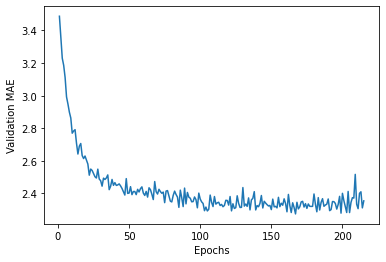

In [75]:
# plot the average mae scores
mae_scores = np.array(all_scores)
avg_mae = np.mean(mae_scores, axis=0)[10:]

plt.plot(range(1, len(avg_mae) + 1), avg_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [76]:
# evaluate the model on test data
model = build_model()
model.fit(train_data, train_label, batch_size=16, epochs=epochs, verbose=0)
model.evaluate(test_data, test_label)


4/4 [==============================] - 0s 844us/step - loss: 11.7387 - mae: 2.3372


[11.7387113571167, 2.3371615409851074]